# Linear Regression

In [1]:
import numpy as np # used for scientific computing
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for visualization and plotting
np.random.seed(42) 

# make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

## Part 1: Data Preprocessing

We will use a dataset containing housing prices in King County, USA. The dataset contains 5,000 observations with 18 features and a single target value - the house price. 

First, we will read and explore the data using pandas and the `.read_csv` method.

In [2]:
# Read comma separated data
df = pd.read_csv('data.csv')
# df stands for dataframe, which is the default format for datasets in pandas

### Data Exploration
Let's start by looking at the top of the dataset using the `df.head()` command. This will be the first indication that we read our data properly, and that the headers are correct. Next, we will use `df.describe()` to show statistics on the data and check for trends and irregularities.

In [3]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.000000e+03,5.000000e+03,5000.0000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,4.630823e+09,5.394699e+05,3.3714,2.062150,2061.036800,1.615893e+04,1.432600,0.009400,0.243000,3.455000,7.595200,1753.151000,1966.660800,95.052800,98078.812600,47.559312,-122.215864,1976.84520,13451.164600
std,2.870890e+09,3.873115e+05,0.9104,0.773592,923.727509,4.600220e+04,0.510793,0.096506,0.774643,0.677692,1.166537,818.390844,28.286855,425.234932,54.126332,0.139521,0.141807,674.73601,26514.749009
min,1.000102e+06,7.500000e+04,0.0000,0.000000,380.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.00000,660.000000
25%,2.154075e+09,3.179062e+05,3.0000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1949.000000,0.000000,98033.000000,47.463675,-122.329000,1490.00000,5391.500000
50%,4.022900e+09,4.490000e+05,3.0000,2.000000,1890.000000,7.875000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,1968.000000,0.000000,98070.000000,47.572850,-122.235000,1820.00000,7800.000000
75%,7.345078e+09,6.500000e+05,4.0000,2.500000,2500.000000,1.123400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,1990.000000,0.000000,98118.000000,47.679200,-122.129000,2340.00000,10469.250000
max,9.842300e+09,7.060000e+06,9.0000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.00000,434728.000000


We will start with one variable linear regression by extracting the target column and the `sqft_living` variable from the dataset. We use pandas and select both columns as separate variables and transform them into a numpy array.

In [5]:
X = df['sqft_living'].values
y = df['price'].values

## Preprocessing

As the number of features grows, calculating gradients gets computationally expensive. We can speed this up by normalizing the input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes. We will use [mean normalization](https://en.wikipedia.org/wiki/Feature_scaling) for the fearures (`X`) and the true labels (`y`).

In [6]:
def preprocess(X, y):
    """
    Perform mean normalization on the features and true labels.

    Input:
    - X: Input data (m instances over n features).
    - y: True labels (m instances).

    Returns:
    - X: The mean normalized inputs.
    - y: The mean normalized labels.
    """
    # Finding min and max val in the db
    min_x = np.min(X, axis=0)
    max_x = np.max(X, axis=0)
    avg_x = np.average(X, axis=0)

    X = (X - avg_x) / (max_x - min_x)

    min_y = np.min(y, axis= 0)
    max_y = np.max(y, axis= 0)
    avg_y = np.average(y, axis= 0)

    y = (y - avg_y) / (max_y - min_y)

    return X, y

In [7]:
X, y = preprocess(X, y)
X.shape, y.shape

((5000,), (5000,))

We will split the data into two datasets: 
1. The training dataset will contain 80% of the data and will always be used for model training.
2. The validation dataset will contain the remaining 20% of the data and will be used for model evaluation. For example, we will pick the best alpha and the best features using the validation dataset, while still training the model using the training dataset.

In [8]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]

## Data Visualization
Since this problem has only two parameters, it is possible to create a two-dimensional scatter plot to visualize the data.

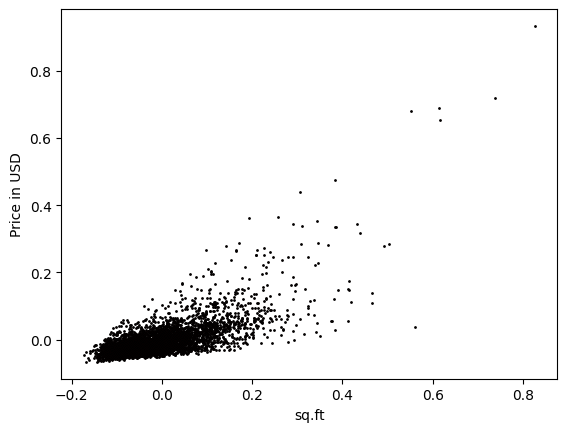

In [9]:
plt.plot(X_train, y_train, 'ro', ms=1, mec='k') # the parameters control the size, shape and color of the scatter plot
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.show()

## Bias Trick

The predications of our linear model are of the form:

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

We will add columns of ones as the zeroth column of the features for both the training and validation sets.

In [10]:
def apply_bias_trick(X):
    """
    Applies the bias trick to the input data.

    Input:
    - X: Input data (m instances over n features).

    Returns:
    - X: Input data with an additional column of ones in the
        zeroth position (m instances over n+1 features).
    """
    # Creating ones vector with the len of X
    if len(X.shape) == 1:
        X = np.reshape(X, (-1, 1))
    ones = np.ones((X.shape[0], 1))

    # Connecting two vectors into one vector with 2 columns
    X = np.concatenate([ones, X], axis=1)

    return X


In [11]:
X_train = apply_bias_trick(X_train)
X_val = apply_bias_trick(X_val)

X_train.shape, X_val.shape

((4000, 2), (1000, 2))

## Part 2: Single Variable Linear Regression
Simple linear regression is a linear regression model with a single explanatory varaible and a single target value. 

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

## Gradient Descent 

Our task is to find the best possible linear line that explains all the points in our dataset. We start by guessing initial values for the linear regression parameters $\theta$ and updating the values using gradient descent. 

The objective of linear regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2
$$

where the hypothesis (model) $h_\theta(x)$ is given by a **linear** model:

$$
h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

$\theta_j$ are parameters of our model, and by changing those values accordingly we will be able to lower the cost function $J(\theta)$ by using gradient descent:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In linear regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.


In [12]:
def compute_cost(X, y, theta):
    """
    Computes the average squared difference between an observation's actual and
    predicted values for linear regression.  

    Input:
    - X: Input data (m instances over n features).
    - y: True labels (m instances).
    - theta: the parameters (weights) of the model being learned.

    Returns:
    - J: the cost associated with the current set of parameters (single number).
    """

    J = 0  # We use J for the cost.

    # Variables
    m = X.shape[0]
    h_theta = X.dot(theta)
    error_squared = (h_theta - y) ** 2

    # Cost equation
    J = (1 / (2 * m)) * np.sum(error_squared)

    return J

In [13]:
theta = np.array([-1, 2])
J = compute_cost(X_train, y_train, theta)
J

0.5110382451954535

In [14]:

def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of the model using gradient descent using 
    the training set. Gradient descent is an optimization algorithm 
    used to minimize some (loss) function by iteratively moving in 
    the direction of steepest descent as defined by the negative of 
    the gradient. We use gradient descent to update the parameters
    (weights) of our model.

    Input:
    - X: Input data (m instances over n features).
    - y: True labels (m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of the model.
    - num_iters: The number of updates performed.

    Returns:
    - theta: The learned parameters of the model.
    - J_history: the loss value for every iteration.
    """

    theta = theta.copy()  # optional: theta outside the function will not change
    J_history = []  # Use a python list to save the cost value in every iteration
    m = X.shape[0]
    for i in range(num_iters):
        h_theta = X.dot(theta)
        error = h_theta - y
        X_t = np.matrix.transpose(X)
        theta = theta - (alpha / m) * np.dot(X_t, error)
        J_history.append(compute_cost(X, y, theta))
    return theta, J_history


In [15]:
np.random.seed(42)
theta = np.random.random(size=2)
iterations = 40000
alpha = 0.1
theta, J_history = gradient_descent(X_train ,y_train, theta, alpha, iterations)

In [16]:
J_history[-1]

0.0008040562476843768

We can evaluate the learning process by monitoring the loss as training progress. In the following graph, we visualize the loss as a function of the iterations. This is possible since we are saving the loss value at every iteration in the `J_history` array.

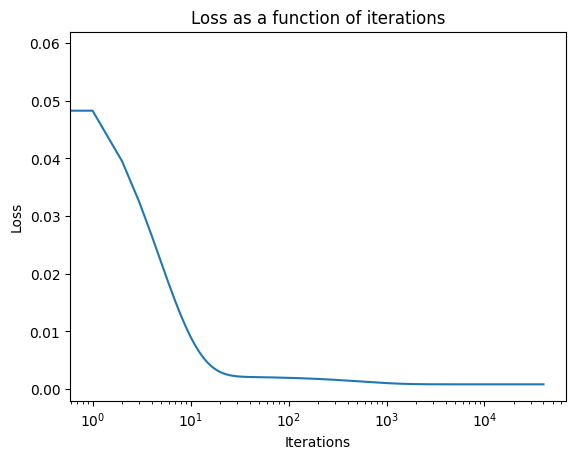

In [17]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.show()

The pseudo inverse solution is a direct approach to finding the best-fitting parameters of the linear model. We will use only direct matrix multiplication, by calculating the inverse of the matrix.


In [18]:
def compute_pinv(X, y):
    """
    Compute the optimal values of the parameters using the pseudoinverse approach.

    Input:
    - X: Input data (m instances over n features).
    - y: True labels (m instances).

    Returns:
    - pinv_theta: The optimal parameters of the model.
    """
    # Variables
    pinv_theta = []
    X_t = np.matrix.transpose(X)
    X_mult = np.dot(X_t, X)
    X_mult_inverse = np.linalg.inv(X_mult)
    X_mult_inverse_mult = np.dot(X_mult_inverse, X_t)

    # Pseudo-inverse formula
    pinv_theta = np.dot(X_mult_inverse_mult, y)

    return pinv_theta


In [19]:
theta_pinv = compute_pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

In [20]:
J_pinv

0.0008040562476843768

We can add the loss value for the theta calculated using the psuedo-inverse to our graph. This is another sanity check as the loss of our model should converge to the psuedo-inverse loss.

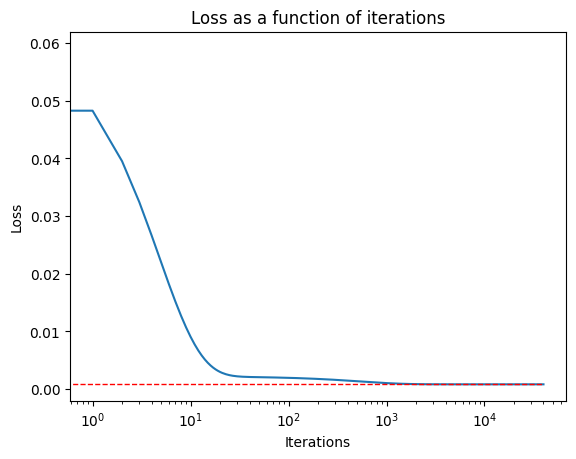

In [21]:
plt.plot(np.arange(len(J_history)), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

We can use a better approach for the implementation of `gradient_descent`. Instead of performing 40,000 iterations, we wish to stop when the improvement of the loss value is smaller than `1e-8` from one iteration to the next. 

The learning rate is another factor that determines the performance of our model in terms of speed and accuracy.

In [22]:
def efficient_gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of the model using the training set, but stop 
    the learning process once the improvement of the loss value is smaller 
    than 1e-8.

    Input:
    - X: Input data (m instances over n features).
    - y: True labels (m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of the model.
    - num_iters: The number of updates performed.

    Returns:
    - theta: The learned parameters of the model.
    - J_history: the loss value for every iteration.
    """

    theta = theta.copy()  # optional: theta outside the function will not change
    J_history = []  # Use a python list to save the cost value in every iteration
    m = X.shape[0]
    i = 0
    while i < num_iters and (len(J_history) < 2 or J_history[-2] - J_history[-1] > 1E-8):
        h_theta = X.dot(theta)
        error = h_theta - y
        X_t = np.matrix.transpose(X)
        theta = theta - (alpha / m) * np.dot(X_t, error)
        J_history.append(compute_cost(X, y, theta))
        i += 1
    return theta, J_history


def find_best_alpha(X_train, y_train, X_val, y_val, iterations):
    """
    Iterate over the provided values of alpha and train a model using 
    the training dataset. maintain a python dictionary with alpha as the 
    key and the loss on the validation set as the value.

    Input:
    - X_train, y_train, X_val, y_val: the training and validation data
    - iterations: maximum number of iterations

    Returns:
    - alpha_dict: A python dictionary - {alpha_value : validation_loss}
    """

    alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
    alpha_dict = {}  # {alpha_value: validation_loss}

    # Creating a random theta
    np.random.seed(42)
    theta = np.random.random(size=X_train.shape[1])

    # Creating the dict - alpha:cost
    for alpha in alphas:
        theta_alpha, J_history = efficient_gradient_descent(X_train, y_train, theta, alpha, iterations)
        alpha_dict[alpha] = compute_cost(X_val, y_val, theta_alpha)

    return alpha_dict


In [23]:
alpha_dict = find_best_alpha(X_train, y_train, X_val, y_val, 40000)

We can now obtain the best learning rate from the dictionary `alpha_dict` in a single line.

In [24]:
best_alpha = min(alpha_dict, key=alpha_dict.get)
print(best_alpha)

1


The following code gets the best three alpha values we calculated and provides a graph with three lines indicating the training loss as a function of iterations.

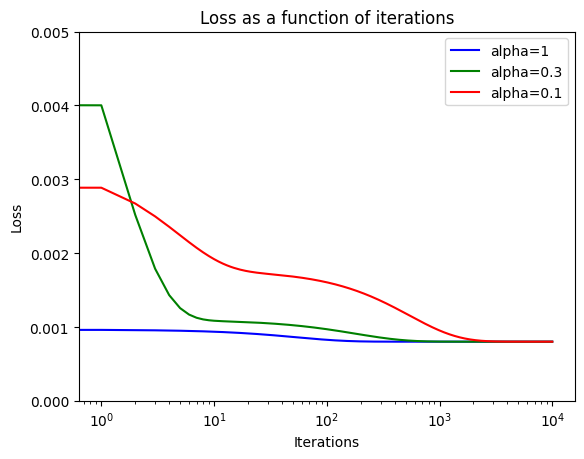

In [25]:
top_3_alphas = sorted([(value, key) for key, value in alpha_dict.items()], reverse=False)[:3]
top_3_alphas = [x[1] for x in top_3_alphas]

histories = []
for alpha in top_3_alphas:
    params = np.random.random(size=2)
    _, J_history = gradient_descent(X_train ,y_train, params, alpha, num_iters=10000)
    histories.append(J_history)

for i, (alpha, color) in enumerate(zip(top_3_alphas, ['b','g','r'])):
    plt.plot(np.arange(10000), histories[i], color, label='alpha='+str(alpha))

plt.xscale('log')
plt.ylim(0, 0.005)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.legend()
plt.show()


This function plots the regression lines of our model and the model based on the pseudoinverse calculation. 
Both models should exhibit the same trend through the data. 

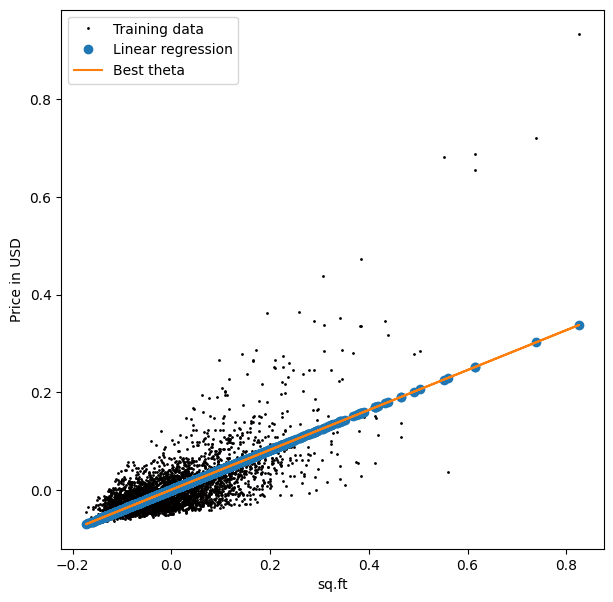

In [26]:
plt.figure(figsize=(7, 7))
plt.plot(X_train[:,1], y_train, 'ro', ms=1, mec='k')
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.plot(X_train[:, 1], np.dot(X_train, theta), 'o')
plt.plot(X_train[:, 1], np.dot(X_train, theta_pinv), '-')

plt.legend(['Training data', 'Linear regression', 'Best theta']);

## Part 2: Multivariate Linear Regression

In most cases, we will deal with datasets that have more than one feature. It can be as little as two features and up to thousands of features. In those cases, we use a multivariate linear regression model. The regression equation is almost the same as the simple linear regression equation:

$$
\hat{y} = h_\theta(\vec{x}) = \theta^T \vec{x} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n
$$

In [27]:
# Read comma separated data
df = pd.read_csv('data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


## Preprocessing

Like in the single variable case, we need to create a numpy array from the dataframe. Before doing so, we should notice that some of the features are clearly irrelevant so we will go ahead and drop them.

In [28]:
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

Notice that proper vectorized implementation should work regardless of the dimensionality of the input.

In [29]:
# preprocessing
X, y = preprocess(X, y)

In [30]:
X

array([[-0.04126667, -0.15735556, -0.09120464, ..., -0.03430859,
        -0.12318089, -0.01797222],
       [-0.04126667,  0.02782963,  0.0526877 , ..., -0.08601835,
        -0.05548263, -0.01338999],
       [-0.15237778, -0.15735556, -0.1336477 , ..., -0.01429191,
         0.14374368, -0.01241548],
       ...,
       [-0.04126667, -0.08328148, -0.04979677, ...,  0.00155463,
        -0.11157547, -0.00643485],
       [-0.04126667, -0.00920741, -0.08602865, ...,  0.15167973,
        -0.07869346, -0.0044559 ],
       [ 0.18095556,  0.06486667,  0.01438542, ..., -0.11187323,
        -0.13091783, -0.02158916]])

In [31]:
# training and validation split 
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

Using 3D visualization, we can still observe trends in the data.

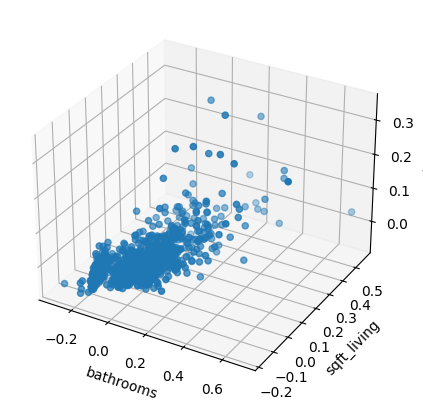

In [32]:
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
xx = X_train[:, 1][:1000]
yy = X_train[:, 2][:1000]
zz = y_train[:1000]
ax.scatter(xx, yy, zz, marker='o')
ax.set_xlabel('bathrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.show()

Now, we want to make sure that the functions `apply_bias_trick`, `compute_cost`, `gradient_descent`, `efficient_gradient_descent` and `compute_pinv` work on the multi-dimensional dataset.

In [33]:
# bias trick
X_train = apply_bias_trick(X_train)
X_val = apply_bias_trick(X_val)

X_train.shape, X_val.shape

((4000, 18), (1000, 18))

In [34]:
# calculating the cost
shape = X_train.shape[1]
theta = np.ones(shape)
J = compute_cost(X_train, y_train, theta)

In [35]:
J

0.946911868099815

In [36]:
# running the efficient version of gradient descent
np.random.seed(42)
shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40000
theta, J_history = efficient_gradient_descent(X_train ,y_train, theta, best_alpha, iterations)
J_history[-1]

0.00047191328760147884

In [37]:
# calculating the pseudoinverse
theta_pinv = compute_pinv(X_train, y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)
J_pinv

0.0004698776755230916

We can use visualization to make sure the code works well. We use logarithmic scale for the number of iterations, since gradient descent converges after ~500 iterations.

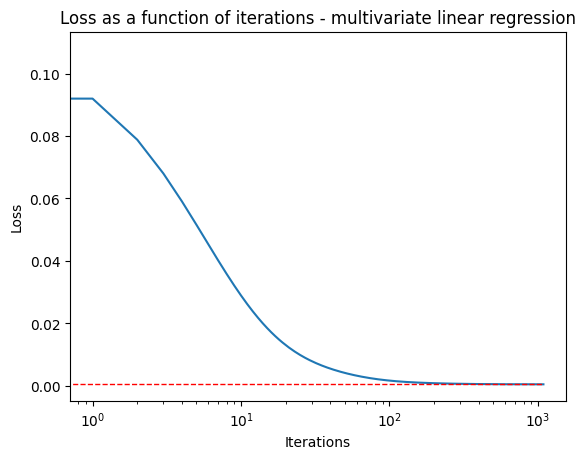

In [38]:
plt.plot(np.arange(len(J_history)), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - multivariate linear regression')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

## Part 3: Forward feature selection

Adding additional features to our regression model makes it more complicated but does not necessarily improves performance. 

Forward feature selection is a greedy, iterative algorithm used to select the most relevant features for a predictive model. The objective of this algorithm is to improve the model's performance by identifying and using only the most relevant features, potentially reducing overfitting, improving accuracy, and reducing computational cost. 

We will implement forward feature selection: 
1. Start with an empty set of selected features.
1. For each feature not yet in the selected set, do the following:
    1. Add the feature to the selected set temporarily.
    1. Train a model using the current set of selected features and evaluate its performance by calculating the cost or error on a validation set.
    1. Remove the temporarily added feature from the selected set.
1. Choose the feature that resulted in the best model performance and permanently add it to the selected set.
1. Repeat steps 2-3 until we have 5 features (not including the bias).


In [39]:
df = pd.read_csv('data.csv')
feature_names = df.drop(columns=['price', 'id', 'date']).columns.values
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

# preprocessing
X, y = preprocess(X, y)

# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

In [40]:
def forward_feature_selection(X_train, y_train, X_val, y_val, best_alpha, iterations):
    """
    Forward feature selection is a greedy, iterative algorithm used to 
    select the most relevant features for a predictive model. The objective 
    of this algorithm is to improve the model's performance by identifying 
    and using only the most relevant features, potentially reducing overfitting, 
    improving accuracy, and reducing computational cost.

    Input:
    - X_train, y_train, X_val, y_val: the input data without bias trick
    - best_alpha: the best learning rate previously obtained
    - iterations: maximum number of iterations for gradient descent

    Returns:
    - selected_features: A list of selected top 5 feature indices
    """
    selected_features = []
    n = X_train.shape[1]

    while len(selected_features) < 5:
        cheapest = float('inf')
        cheapest_index = None
        for i in range(n):
            if i not in selected_features:
                # Add temp feature
                selected_features.append(i)

                # Modify train and val data according to selected features
                X_train_temp = X_train[:, selected_features]
                X_train_temp = apply_bias_trick(X_train_temp)

                X_val_temp = X_val[:, selected_features]
                X_val_temp = apply_bias_trick(X_val_temp)

                # Compute theta and cost with efficient gradient
                np.random.seed(42)
                theta = np.random.random(size=X_train_temp.shape[1])

                theta, _ = efficient_gradient_descent(X_train_temp, y_train, theta, best_alpha, iterations)
                price = compute_cost(X_val_temp, y_val, theta)

                # Find the cheapest feature
                if price < cheapest:
                    cheapest = price
                    cheapest_index = i

                # Temporarily remove this feature from the list to evaluate the model performance without it
                selected_features.remove(i)

        # Add the feature with the lowest validation cost back to the list
        selected_features.append(cheapest_index)

    return selected_features


In [41]:
ffs = forward_feature_selection(X_train, y_train, X_val, y_val, best_alpha, iterations)
for feature in ffs:
    print(feature_names[feature])

sqft_living
lat
waterfront
grade
yr_built


## Part 4: Polynomial regression

This is the last part! 

we will implement a function to create polynomial features up to a degree of 2 for given dataset. The function takes a pandas DataFrame as input and returns a new DataFrame with all possible square features, including the original features.

After we obtain the polynomial dataframe, we will use forward feature selection and print the 5 best features.


In [42]:
def create_square_features(df):
    """
    Create square features for the input data.

    Input:
    - df: Input data (m instances over n features) as a dataframe.

    Returns:
    - df_poly: The input data with polynomial features added as a dataframe with feature names
    """

    df_poly = df.copy()
    columns = df.columns

    # Adds a new column for square values
    for feature in columns:
        df_poly[feature + "^2"] = pow(df_poly[feature], 2)

    # Adds a new column for features val multiplication
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            df_poly[f"{columns[i]}*{columns[j]}"] = df_poly[columns[i]] * df_poly[columns[j]]

    return df_poly

In [43]:
df = pd.read_csv('data.csv')

y = df['price'].values
df = df.drop(columns=['price', 'id', 'date'])
df = df.astype('float64')
df_poly = create_square_features(df)
X = df_poly.values
X.shape, y.shape

C:\Users\noabe\AppData\Local\Temp\ipykernel_34456\2234196660.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_poly[f"{columns[i]}*{columns[j]}"] = df_poly[columns[i]] * df_poly[columns[j]]
C:\Users\noabe\AppData\Local\Temp\ipykernel_34456\2234196660.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_poly[f"{columns[i]}*{columns[j]}"] = df_poly[columns[i]] * df_poly[columns[j]]
C:\Users\noabe\AppData\Local\Temp\ipykernel_34456\2234196660.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

((5000, 170), (5000,))

In [44]:
# preprocessing
X, y = preprocess(X, y)

In [45]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

In [46]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4000, 170), (1000, 170), (4000,), (1000,))

In [47]:
feature_names = df_poly.columns.values

In [48]:
ffs = forward_feature_selection(X_train, y_train, X_val, y_val, best_alpha, iterations)

In [49]:
for feature in ffs:
    print(feature_names[feature])

sqft_living*grade
lat*long
bathrooms*waterfront
yr_built*zipcode
sqft_living*yr_built


## In summery
We explored different gradient descent techniques and visualizations. 

We hope you now have a better understanding of the process and the goal of linear regression, which is to predict the value of dependent variables based on independent variables.

Thanks for reading!